## Tutorial notebook on how to use the CLMS Data Store for `CDSE` datasets from the `CLMS API`

This notebook shows the lazy opening of datasets from the CLMS API that are opened as xarray datasets

### Setup
In order to run this notebook, you need to install [`xcube_clms`](https://github.com/xcube-dev/xcube-clms). You can install it following either of the steps below:

1. via `conda-forge`
```bash
conda env create -f environment.yml
conda activate xcube-clms
conda install xcube-clms
```

2. via Development mode

```bash
git clone https://github.com/xcube-dev/xcube-clms.git
cd xcube-clms
conda env create -f environment.yml
conda activate xcube-clms
pip install .
```


Note that [`xcube_clms`](https://github.com/xcube-dev/xcube-clms) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

You also need the credentials from the Land Monitoring service. Please follows the steps outlined [`here`](https://eea.github.io/clms-api-docs/authentication.html) to download your credentials and place them in the same directory as this notebook.

In [1]:
%%time
import json

from xcube.core.store import new_data_store

CPU times: user 3.94 s, sys: 305 ms, total: 4.24 s
Wall time: 1.54 s


To get the credentials.json, please follow the steps outlined [here](https://eea.github.io/clms-api-docs/authentication.html)

In [2]:
%%time
json_file_path = "credentials.json"
with open(json_file_path, "r") as j:
    credentials = json.loads(j.read())

CPU times: user 52 μs, sys: 809 μs, total: 861 μs
Wall time: 487 μs


In [3]:
%%time
clms_data_store = new_data_store("clms", credentials=credentials)

CPU times: user 51.7 ms, sys: 17 ms, total: 68.7 ms
Wall time: 68.9 ms


In [4]:
data_ids = clms_data_store.list_data_ids()

In [5]:
for data_id in data_ids:
    if "soil" in data_id:
        print(data_id)

daily-surface-soil-moisture-v1.0


In [6]:
%%time
clms_data_store.get_data_store_params_schema()

CPU times: user 57 μs, sys: 6 μs, total: 63 μs
Wall time: 67.9 μs


In [7]:
%%time
clms_data_store.get_data_opener_ids()

CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 8.58 μs


('dataset:zarr:file', 'dataset:netcdf:https')

In [8]:
%%time
clms_data_store.get_data_types()

CPU times: user 7 μs, sys: 1 μs, total: 8 μs
Wall time: 10.5 μs


('dataset',)

In [9]:
%%time
clms_data_store.get_open_data_params_schema()

CPU times: user 52.1 ms, sys: 3.02 ms, total: 55.1 ms
Wall time: 733 ms


In [10]:
%%time
clms_data_store.get_open_data_params_schema("daily-surface-soil-moisture-v1.0")

CPU times: user 50.8 ms, sys: 1 μs, total: 50.8 ms
Wall time: 901 ms


In [11]:
%%time
clms_data_store.has_data("daily-surface-soil-moisture-v1.0")

CPU times: user 310 ms, sys: 2.22 ms, total: 313 ms
Wall time: 1.08 s


True

In [12]:
%%time
time_range = ("2020-01-01", "2020-01-31")
dataset = clms_data_store.open_data("daily-surface-soil-moisture-v1.0", time_range=time_range)

CPU times: user 3.18 s, sys: 1.9 s, total: 5.07 s
Wall time: 2min 3s


In [13]:
dataset

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 31, y: 4144, x: 6832)
Coordinates:
  * time       (time) object 248B 2020-01-01 00:00:00 ... 2020-01-07 00:00:00
  * y          (y) float64 33kB 72.0 71.99 71.98 71.97 ... 35.02 35.01 35.0
  * x          (x) float64 55kB -11.0 -10.99 -10.98 -10.97 ... 49.98 49.99 50.0
    crs        int64 8B 0
Data variables:
    ssm        (time, y, x) uint8 878MB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
    ssm_noise  (time, y, x) uint8 878MB dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
Attributes: (12/26)
    archive_facility:          VITO
    Conventions:               CF-1.6
    copyright:                 Copernicus Service information 2020
    geospatial_lat_max:        72
    geospatial_lat_min:        35
    geospatial_lon_max:        50
    ...                        ...
    region_name:               CEURO
    sensor:                    CSAR
    source:                    Derived from EO radar observations
    time_coverage_end:         2020-01-01T23:59:59Z
    time_coverage_start:       2020-01-01T00:00:00Z
    title:                     Daily Surface Soil Moisture 1km: CEURO 2020-01...

CPU times: user 3.72 s, sys: 2.23 s, total: 5.95 s
Wall time: 52.4 s


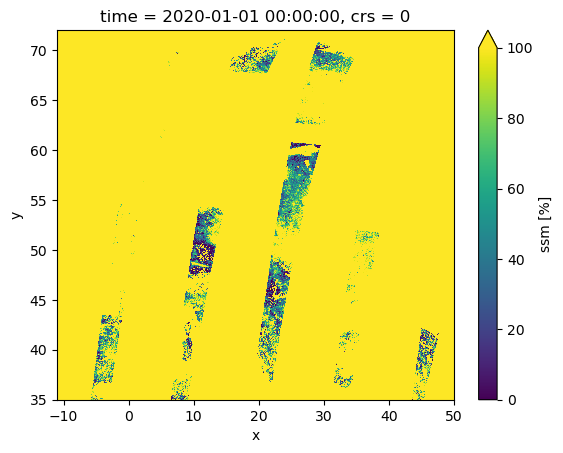

In [14]:
%%time
dataset.isel(time=0).ssm.plot(vmin=0, vmax=100)